In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Choose a Distribution to Use

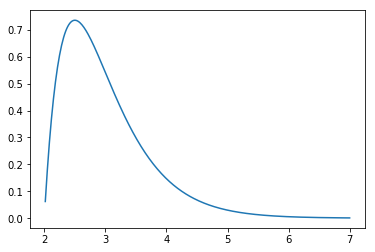

In [15]:
dist = stats.gamma(2, 2, 0.5)
x = np.linspace(*dist.interval(.999), 300)
plt.plot(x, dist.pdf(x));

## Draw Random Data from this Distribution

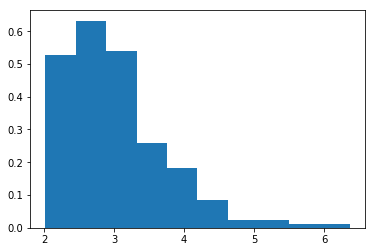

In [17]:
n = 400
data = dist.rvs(n)
plt.hist(data, density=True);

## Bootstrap from this Data

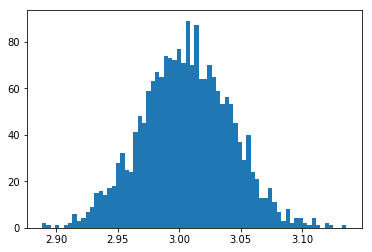

In [26]:
boot_ci = 2000
boot_means = np.random.choice(data, size=(len(data), boot_ci)).mean(axis=0)
plt.hist(boot_means, bins=70);

In [68]:
ci68 = np.percentile(boot_means, [16, 84])
ci95 = np.percentile(boot_means, [2.5, 97.5])
ci68, ci95

(array([2.97012817, 3.04163296]), array([2.93400201, 3.07605081]))

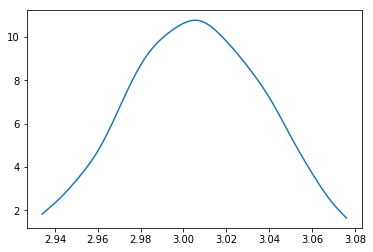

In [69]:
kde = stats.gaussian_kde(boot_means)
boot_x = np.linspace(*ci95, num=200)
plt.plot(boot_x, kde.evaluate(boot_x))

In [87]:
np.mean(boot_x)

3.0050264123187964

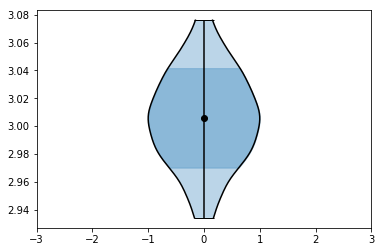

In [106]:
kdf = kde.evaluate(boot_x)
kdf /= kdf.max()
plt.fill_betweenx(boot_x, -kdf, kdf, alpha=0.3)

boot_x2 = np.linspace(*ci68, num=200)
kdf2 = kde.evaluate(boot_x2)
kdf2 /= kdf2.max()
plt.fill_betweenx(boot_x2, -kdf2, kdf2, alpha=0.3, color=sns.color_palette()[0])
plt.plot(kdf, boot_x, 'k')
plt.plot(-kdf, boot_x, 'k')
ci_mean = np.mean(boot_means)
plt.errorbar(0, ci_mean, [[ci_mean - np.max(boot_x)], [np.min(boot_x) - ci_mean]], fmt='ko', capsize=10)
plt.xlim(-3, 3);

In [129]:
kde.scotts_factor()

0.2186724147886556

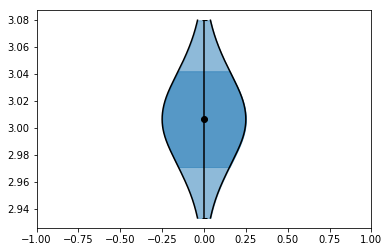

In [179]:
def plot_catseye(x, data, show_bars=True, boot_ci=6000, estimator=np.mean, scale=1., color=sns.color_palette()[0], ax=None):
    if ax is None:
        ax = plt.gca()
        
    boots = np.apply_along_axis(estimator, axis=0, arr=np.random.choice(data, size=(len(data), boot_ci)))
    kde = stats.gaussian_kde(boots, bw_method=0.35)
    for ci in [68.27, 95.45]:
        ci_x = np.linspace(*np.percentile(boots, [(100-ci)/2, (100+ci)/2]), num=300)
        kdf = kde.pdf(ci_x)
        kdf /= kdf.max() / scale * 2  # Rescale 
        ax.fill_betweenx(ci_x, -kdf + x, kdf + x, alpha=0.5, color=color)
    ax.plot(kdf + x, ci_x, 'k')
    ax.plot(-kdf + x, ci_x, 'k')
    ci_mean = np.mean(boots)
    if show_bars:
        plt.errorbar(x, ci_mean, [[ci_mean - ci_x.max()], [ci_x.min() - ci_mean]], capsize=10 * scale / 2, fmt='ko')
    else:
        plt.plot([-kdf.max() + x, kdf.max() + x], [ci_mean, ci_mean], 'k')
        
#     plt.hist(boots)

plot_catseye(0, data, show_bars=True, scale=0.5)
plt.xlim(-1, 1);

[[<matplotlib.axis.XTick at 0x1d8d2580c50>,
 [Text(0, 0, 'Control'), Text(0, 0, 'Treatment')],
 (-1, 2)]

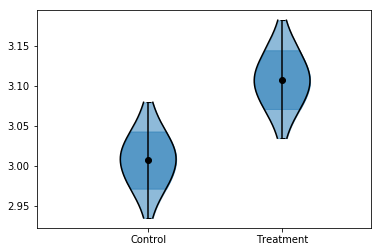

In [198]:
show_bars = True
fig, ax = plt.subplots()
plot_catseye(0, data, show_bars=show_bars, scale=0.5, ax=ax)
plot_catseye(1.2, data + 0.1, show_bars=show_bars, scale=0.5, ax=ax)
ax.set(xlim=(-1, 2), xticks=[0, 1.2], xticklabels=['Control', 'Treatment'])